In [62]:
import numpy as np 
import pandas as  pd 
import matplotlib.pyplot as plt 
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Loading the data

In [63]:
ts = pd.read_csv("C:\\Users\\sumeera\\Desktop\\timeseries datasets\\monthly-beer-production-in-austr.csv")

In [64]:
ts.head()

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [65]:
ts['Month']=pd.to_datetime(ts['Month'])

In [66]:
ts.set_index('Month',inplace=True)

# Visualizing the data

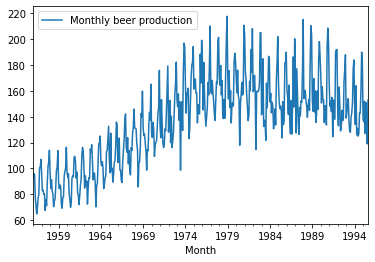

In [44]:
ts.plot()

In [45]:
ts.rename(columns={'Monthly beer production':'Production'},inplace=True)

# Checking whether data is stotioanry or not

In [46]:
def adfullertest(Production):
    res = adfuller(Production)
    labels = ['T_critical','P_value','Lags_used',"observation_used"]
    for values,labels in zip(res,labels):
        print(labels+" : "+str(values))
        if res[1] <= 0.05:
            print("Reject null hypo and data is stationary")
        else:
            print('Cant reject null hypo and data is non stationary')
                  
                  

In [47]:
adfullertest(ts['Production'])

T_critical : -2.282661418787579
Cant reject null hypo and data is non stationary
P_value : 0.17762099829132444
Cant reject null hypo and data is non stationary
Lags_used : 17
Cant reject null hypo and data is non stationary
observation_used : 458
Cant reject null hypo and data is non stationary


In [48]:
#differencing 
# ts['seasonal diff']=ts['Production']-ts['Production'].shift(36)

In [49]:
# ts.head()

In [50]:
# adfullertest(ts['seasonal diff'].dropna())

In [51]:
# ts['next seasonal diff']=ts['seasonal diff']-ts['seasonal diff'].shift(12)

In [52]:
# adfullertest(ts['next seasonal diff'].dropna())

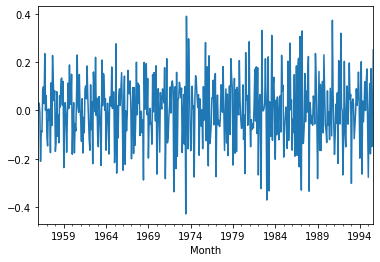

In [53]:
ts['Production_log']=np.log(ts['Production'])
ts['seasonal']=ts['Production_log']-ts['Production_log'].shift(1)
ts['seasonal'].plot()

In [54]:
adfullertest(ts['seasonal'].dropna())

T_critical : -4.869645674436251
Reject null hypo and data is stationary
P_value : 3.994274317729147e-05
Reject null hypo and data is stationary
Lags_used : 18
Reject null hypo and data is stationary
observation_used : 456
Reject null hypo and data is stationary


# AR ,I and MA values by plot_acf and plot_pacf

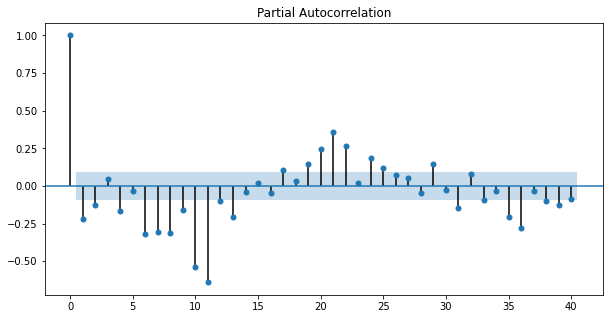

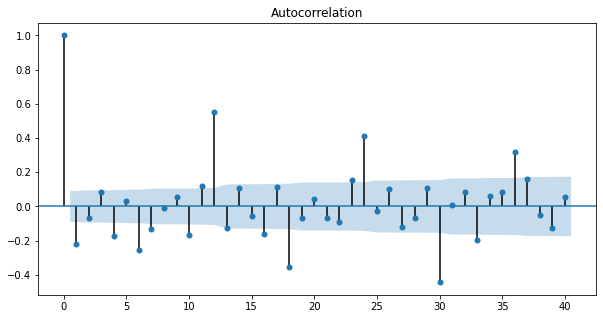

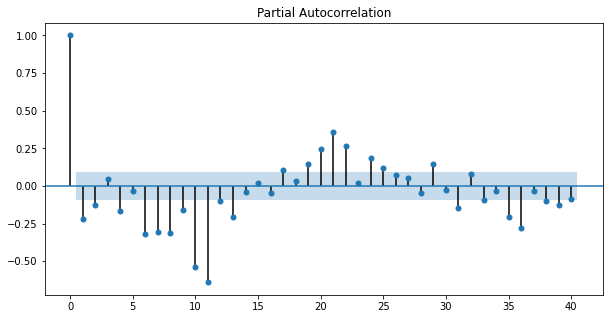

In [55]:
fig,ax = plt.subplots(figsize=(10,5))
plot_acf(ts['seasonal'].dropna(),lags=40,ax=ax)
fig,ax = plt.subplots(figsize=(10,5))
plot_pacf(ts['seasonal'].dropna(),lags=40,ax=ax)


# Final step fit and predict the model

In [60]:
model =ARIMA(ts['seasonal'].dropna(),order=(2,0,2))
clf = model.fit()

C:\Users\sumeera\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


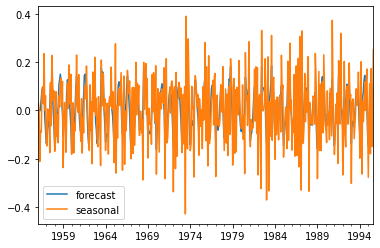

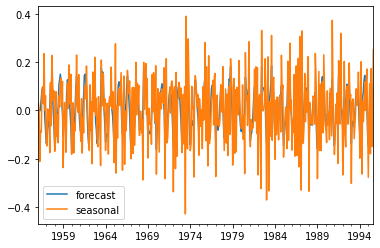

In [61]:
 clf.plot_predict()